## Collecting data

Kaggle data: [Australian Vehicle Prices](https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices/data)

**Description**:
This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

**Provenance**:
The dataset was obtained by scraping car listings from various online platforms in Australia. The data does not contain any personally identifiable information (PII) to ensure privacy and comply with ethical guidelines

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')

## Load and read data

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


1. **Brand**: The brand or manufacturer of the vehicle (e.g., Ssangyong, MG, BMW, Mercedes-Benz, Renault).

2. **Year**: The manufacturing year of the vehicle.

3. **Model**: The specific model name of the vehicle (e.g., Rexton, MG3, 430I, E500, Arkana).

4. **Car/Suv**: Indicates whether the vehicle is a car or SUV.

5. **Title**: Additional information about the vehicle, which may include the model variant, trim, or other details (e.g., "2022 Ssangyong Rexton Ultimate (awd)").

6. **UsedOrNew**: Specifies whether the vehicle is new or used.

7. **Transmission**: The type of transmission in the vehicle (e.g., Automatic).

8. **Engine**: Details about the vehicle's engine, including the number of cylinders and the engine displacement (e.g., 4 cyl, 2.2 L).

9. **DriveType**: The type of drive configuration (e.g., AWD for all-wheel drive, Front for front-wheel drive, Rear for rear-wheel drive).

10. **FuelType**: The type of fuel the vehicle uses (e.g., Diesel, Premium, Unleaded).

11. **FuelConsumption**: The fuel consumption rating of the vehicle, indicating the amount of fuel consumed per unit of distance (e.g., 8.7 L / 100 km).

12. **Kilometres**: The total number of kilometers the vehicle has been driven.

13. **ColourExtInt**: The exterior and interior colors of the vehicle (e.g., White / Black, Black / Black, Grey / White, White / Brown, Grey / Black).

14. **Location**: The location where the vehicle is located or being sold (e.g., Caringbah, NSW).

15. **CylindersinEngine**: The number of cylinders in the vehicle's engine (e.g., 4 cyl, 8 cyl).

16. **BodyType**: The body type of the vehicle (e.g., SUV, Hatchback, Coupe).

17. **Doors**: The number of doors on the vehicle.

18. **Seats**: The number of seats in the vehicle.

19. **Price**: The listed price of the vehicle.

In [3]:
df.shape

(16734, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

## Exploratory Data Analysis (EDA)

### Cleaning data

In [5]:
df.dropna(subset='Price', inplace=True)
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

For columns **Car/Suv**, **BodyType**, the number of null is small, we consider to removing the rows with null values

In [6]:
dropna_cols = ['Car/Suv', 'BodyType']

df.dropna(subset=dropna_cols, inplace=True)

df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 0
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              436
CylindersinEngine       0
BodyType                0
Doors                1321
Seats                1422
Price                   0
dtype: int64

#### Location

Since there are 439 null value in **Location** column, removing these rows may result in a significant loss of data. Alternatively, we can fill the null values with a `Unknown` value.

In [7]:
df['Location'].fillna(value='Unknown', inplace=True)

#### Doors and Seats

Extract the integer value from **Doors** and **Seats** columns, fill null value with mean and round them

In [8]:
df['Doors'] = df['Doors'].str.extract('(\d+)').astype(float)
df['Seats'] = df['Seats'].str.extract('(\d+)').astype(float)

# fillna with round mode
df['Doors'].fillna(value=df['Doors'].describe()['50%'], inplace=True)
df['Seats'].fillna(value=df['Seats'].describe()['50%'], inplace=True)

### Check null values

In [9]:
df.isnull().sum()

# assert all values are not null
assert df.isnull().sum().sum() == 0

### Check duplicates

In [10]:
df.duplicated().sum()

# assert no duplicates
assert df.duplicated().sum() == 0

### Convert column data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16437 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16437 non-null  object 
 1   Year               16437 non-null  float64
 2   Model              16437 non-null  object 
 3   Car/Suv            16437 non-null  object 
 4   Title              16437 non-null  object 
 5   UsedOrNew          16437 non-null  object 
 6   Transmission       16437 non-null  object 
 7   Engine             16437 non-null  object 
 8   DriveType          16437 non-null  object 
 9   FuelType           16437 non-null  object 
 10  FuelConsumption    16437 non-null  object 
 11  Kilometres         16437 non-null  object 
 12  ColourExtInt       16437 non-null  object 
 13  Location           16437 non-null  object 
 14  CylindersinEngine  16437 non-null  object 
 15  BodyType           16437 non-null  object 
 16  Doors              16437 no

Convert the **Kilometres**, **Price** columns to a numerical data type (float) and **Year** column to integer type.

In [12]:
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
df["Price"] = pd.to_numeric(df['Price'], errors='coerce')
df['Year'] = df['Year'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16437 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16437 non-null  object 
 1   Year               16437 non-null  int64  
 2   Model              16437 non-null  object 
 3   Car/Suv            16437 non-null  object 
 4   Title              16437 non-null  object 
 5   UsedOrNew          16437 non-null  object 
 6   Transmission       16437 non-null  object 
 7   Engine             16437 non-null  object 
 8   DriveType          16437 non-null  object 
 9   FuelType           16437 non-null  object 
 10  FuelConsumption    16437 non-null  object 
 11  Kilometres         15871 non-null  float64
 12  ColourExtInt       16437 non-null  object 
 13  Location           16437 non-null  object 
 14  CylindersinEngine  16437 non-null  object 
 15  BodyType           16437 non-null  object 
 16  Doors              16437 no

Extract the numerical values from the **FuelConsumption**, **CylindersinEngine**, **Engine** column to convert it into a numerical data type (e.g., float). This will allow us to perform calculations or comparisons based on fuel consumption.

In [14]:
df['FuelConsumption'] = df['FuelConsumption'].str.extract('([\d.]+) L / 100 km').astype(float)
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract('(\d+)').astype(float)
df['Engine'] = df['Engine'].str.extract('([\d.]+)').astype(float)

Replace non-sense value of **Transmission** and **FuelType** with `Other`

In [15]:
df['Transmission'] = df['Transmission'].replace('-', 'Other')
df['FuelType'] = df['FuelType'].replace('-', 'Other')

In [16]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,4.0,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,4.0,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,4.0,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,8.0,Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,4.0,Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990.0


### Insight plot

#### Histograms of Numerical Features

In [17]:
df.describe()

,Year,Engine,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,16437.000000,15045.000000,15022.000000,15871.000000,15045.000000,16437.000000,16437.000000,1.638900e+04
mean,2016.287705,4.424792,7.666036,100021.809023,4.424792,4.010525,5.093204,3.728021e+04
std,5.148432,1.119494,2.323374,78357.583536,1.119494,0.683889,1.070217,3.715682e+04
min,1959.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01
25%,2013.000000,4.000000,6.500000,40651.500000,4.000000,4.000000,5.000000,1.899900e+04
50%,2017.000000,4.000000,7.600000,85644.000000,4.000000,4.000000,5.000000,2.950000e+04
75%,2020.000000,4.000000,8.800000,146680.500000,4.000000,4.000000,5.000000,4.399000e+04
max,2023.000000,12.000000,27.000000,533849.000000,12.000000,12.000000,22.000000,1.500000e+06


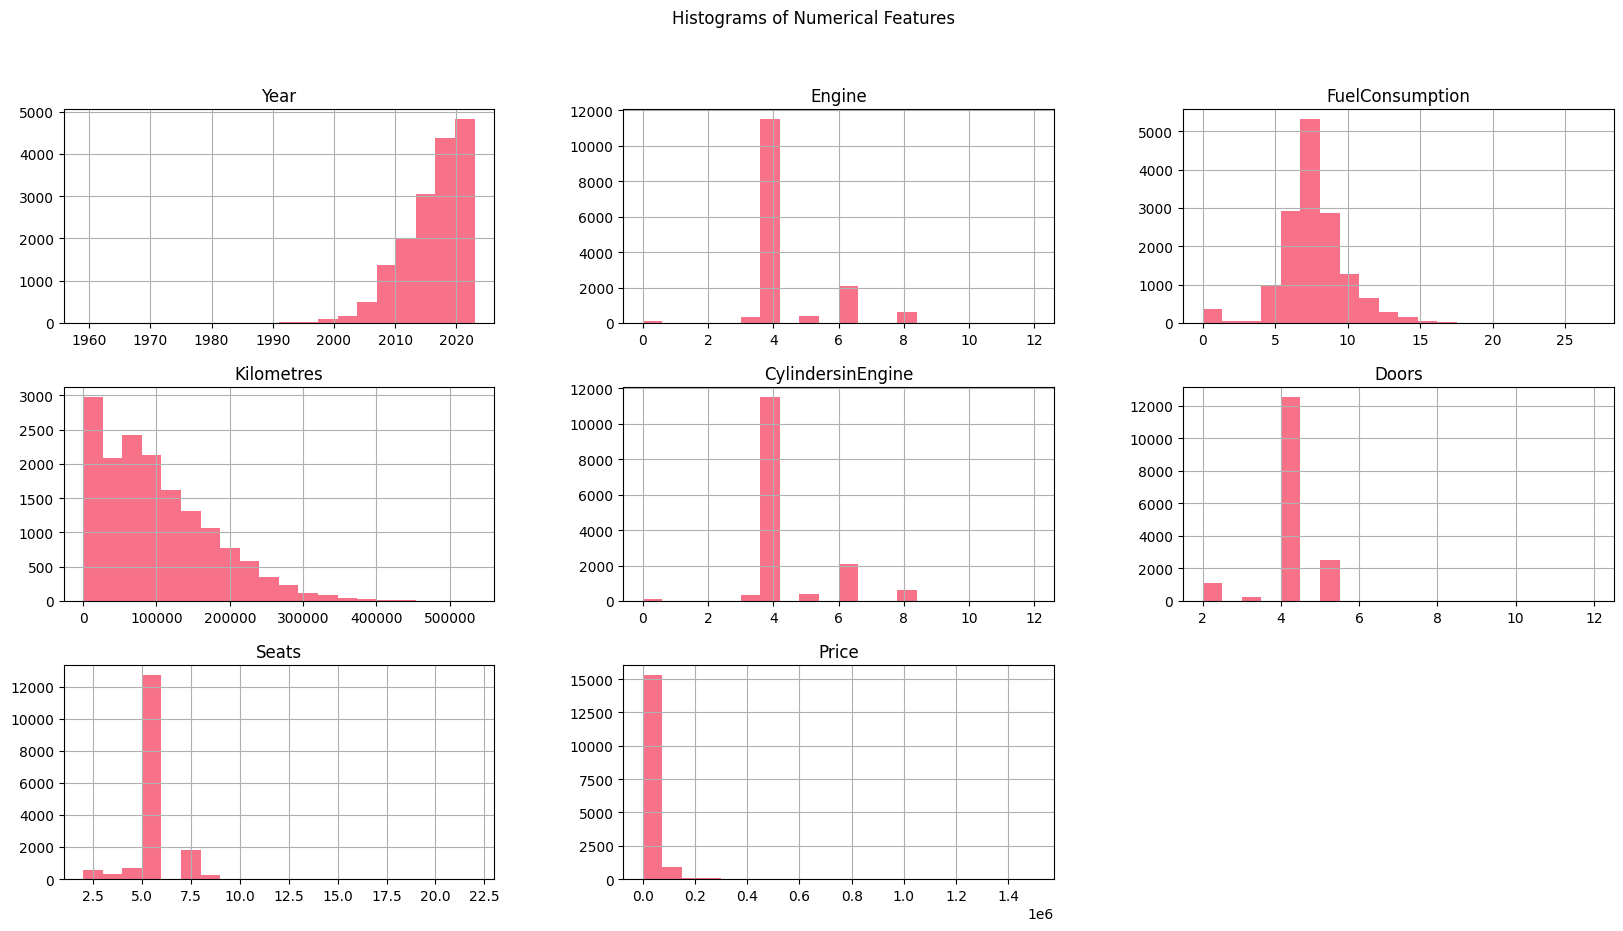

In [18]:
df.hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

The dataset shows diverse engine sizes with a peak around 4.42. Fuel consumption is centered around 7.67, mostly falling within the range of 6.5 to 8.8, with a few higher outliers. Kilometers driven vary widely, peaking around 100,021.81, with a right-skewed distribution indicating low-mileage for most vehicles and high-mileage outliers. The number of cylinders is mainly 4.0, with variations. Most vehicles have 4 doors, but there are outliers with 2 doors. Seat distribution centers around 5.1, with most having 5 seats, but some outliers have up to 22 seats. Vehicle prices vary widely, peaking around $37,280, with a right-skewed distribution indicating lower-priced vehicles as common but with high-priced outliers.

#### Brand Distribution

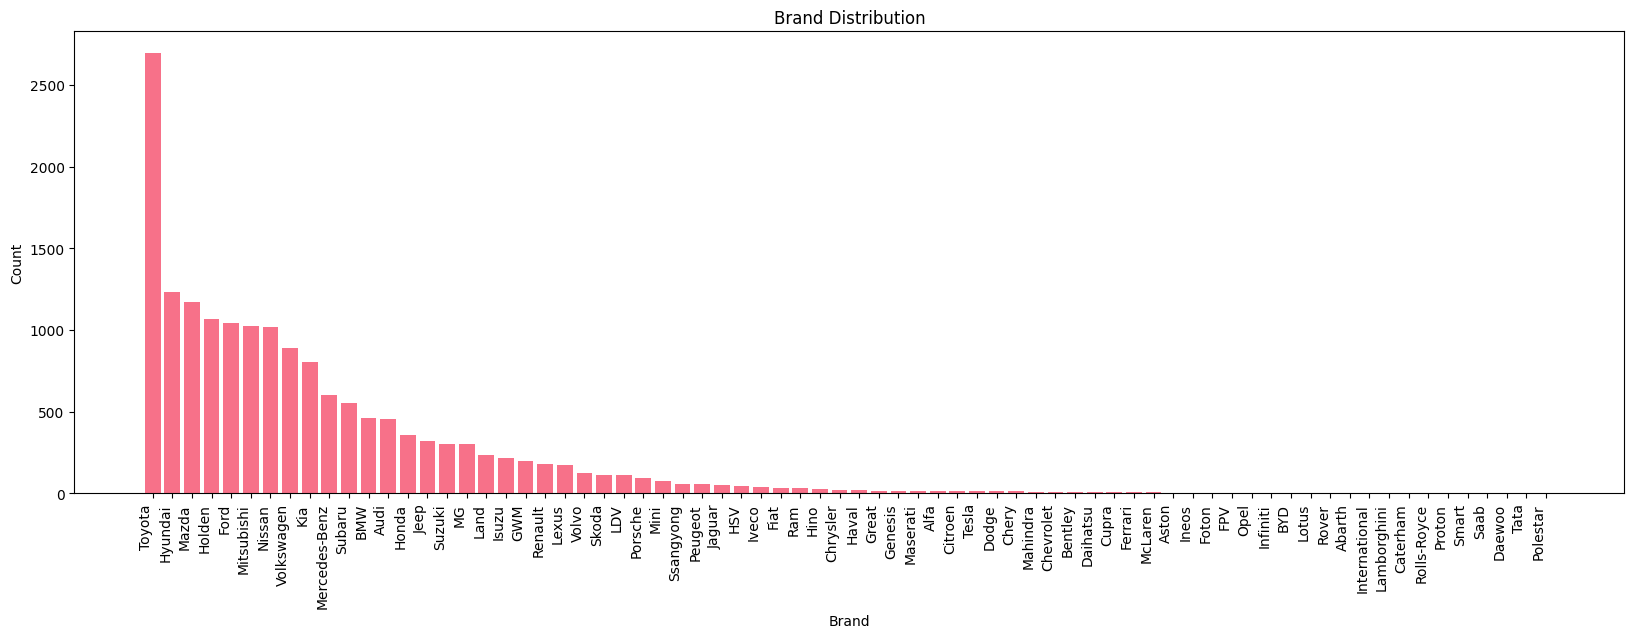

In [19]:
plt.figure(figsize=(20, 6))
brand_counts = df['Brand'].value_counts()
plt.bar(brand_counts.index, brand_counts)
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

Figure shows that `Toyota` is the most popular brand in AUS with over 2500 car models, twice as many as the second brand Hyundai. The third is Mazada has little different from `Hyundai`.

`Holden`, `Ford`, `Mitsubishi`, `Nissan` has no much difference from number of car model.

#### Transmission Type Distribution

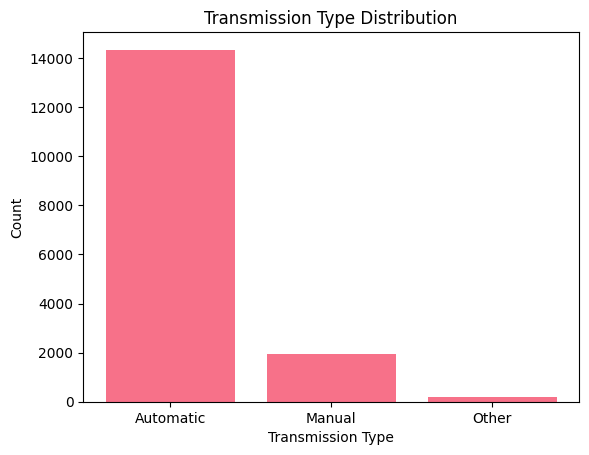

In [20]:
transmission_counts = df['Transmission'].value_counts()
plt.bar(transmission_counts.index, transmission_counts)
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

The number of car models using automatic transmission is the largest among the 3 types of transmissions

#### Fuel Type Distribution

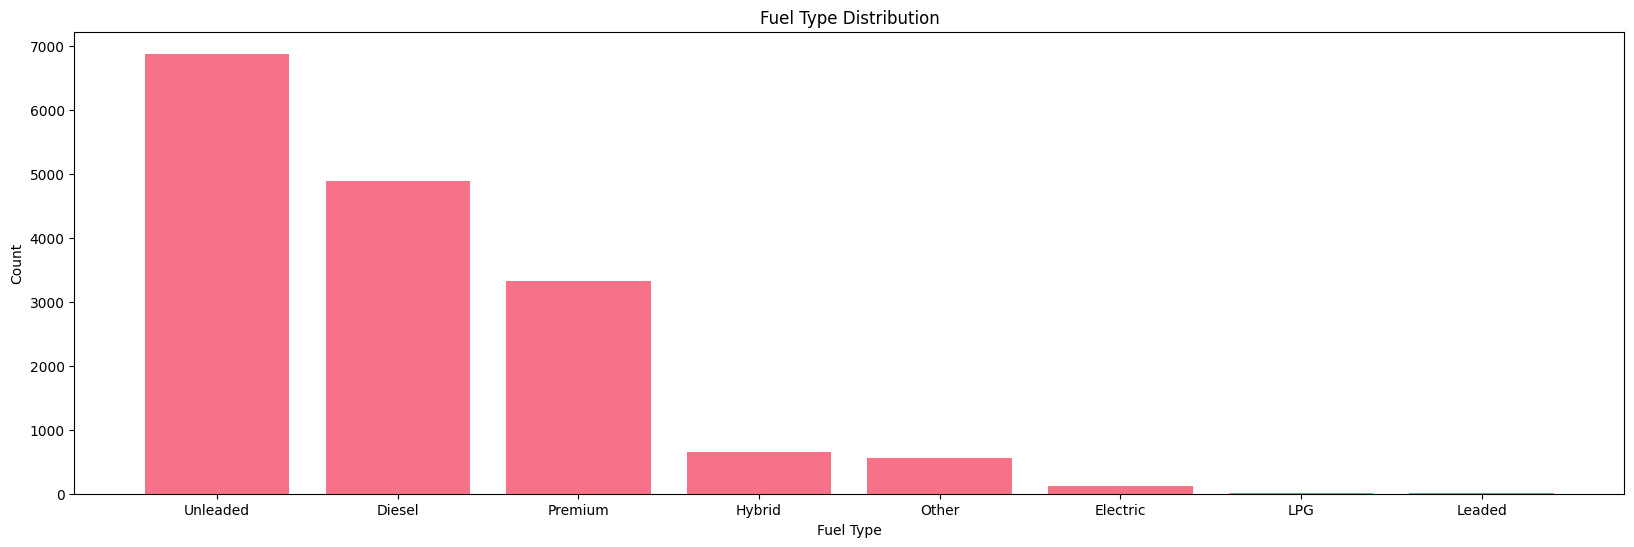

In [21]:
plt.figure(figsize=(20, 6))

fuel_counts = df['FuelType'].value_counts()
plt.bar(fuel_counts.index, fuel_counts)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Car models using `Unleaded`, `Diesel`, `Premium` has the highest proportion

#### Used or New Car distribution

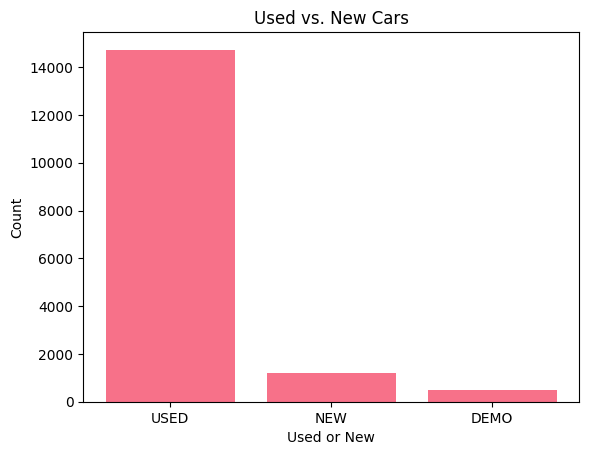

In [22]:
used_vs_new_counts = df['UsedOrNew'].value_counts()
plt.bar(used_vs_new_counts.index, used_vs_new_counts)
plt.title('Used vs. New Cars')
plt.xlabel('Used or New')
plt.ylabel('Count')
plt.show()

The category with the highest model count is used cars, followed by new cars. Demo cars have a comparatively smaller representation.

#### BodyType distribution

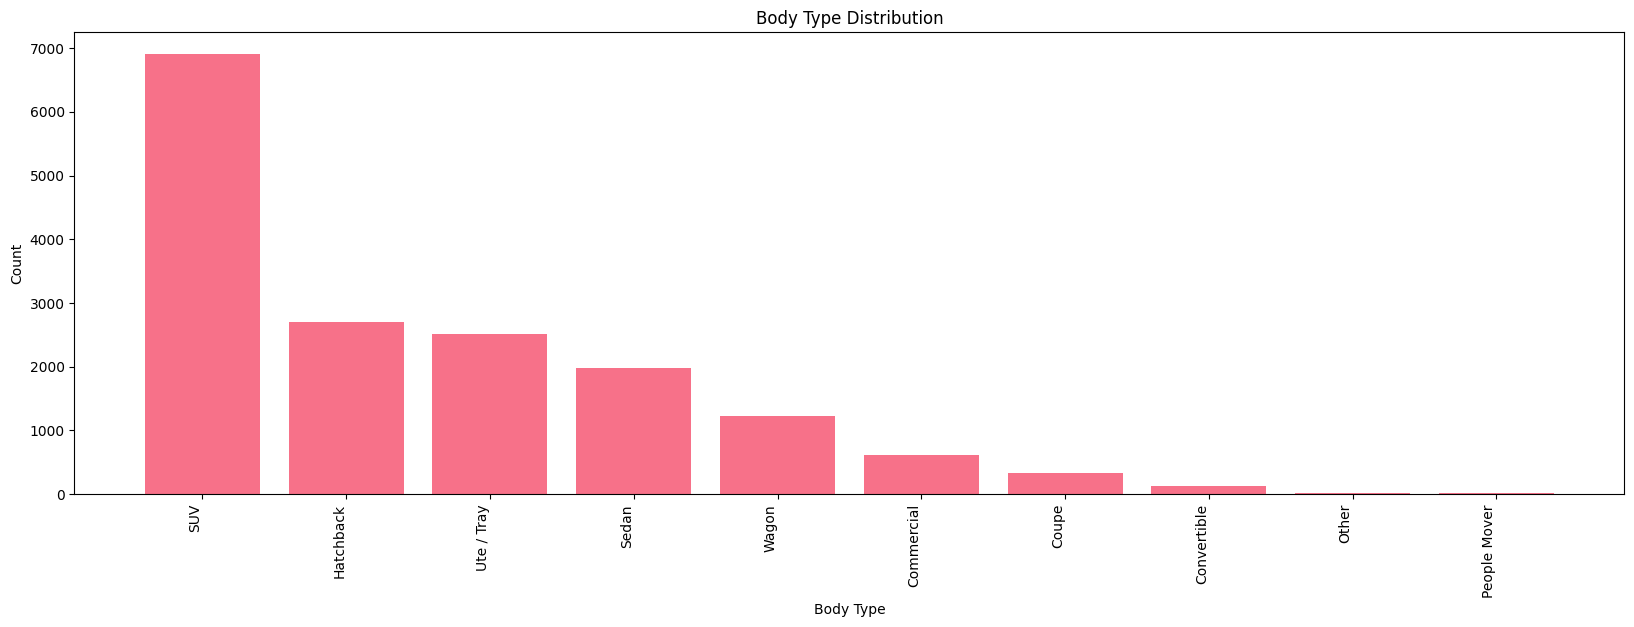

In [23]:
plt.figure(figsize=(20, 6))
brand_counts = df['BodyType'].value_counts()
plt.bar(brand_counts.index, brand_counts)
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

The `SUV` category leads with almost 7000 models, followed by other popular types such as `Hatchback`, `Ute/Tray`, `Sedan`, and `Wagon`.

## Questions

### 1. What is the distribution of vehicle age (based on the year column) for new versus used vehicles?

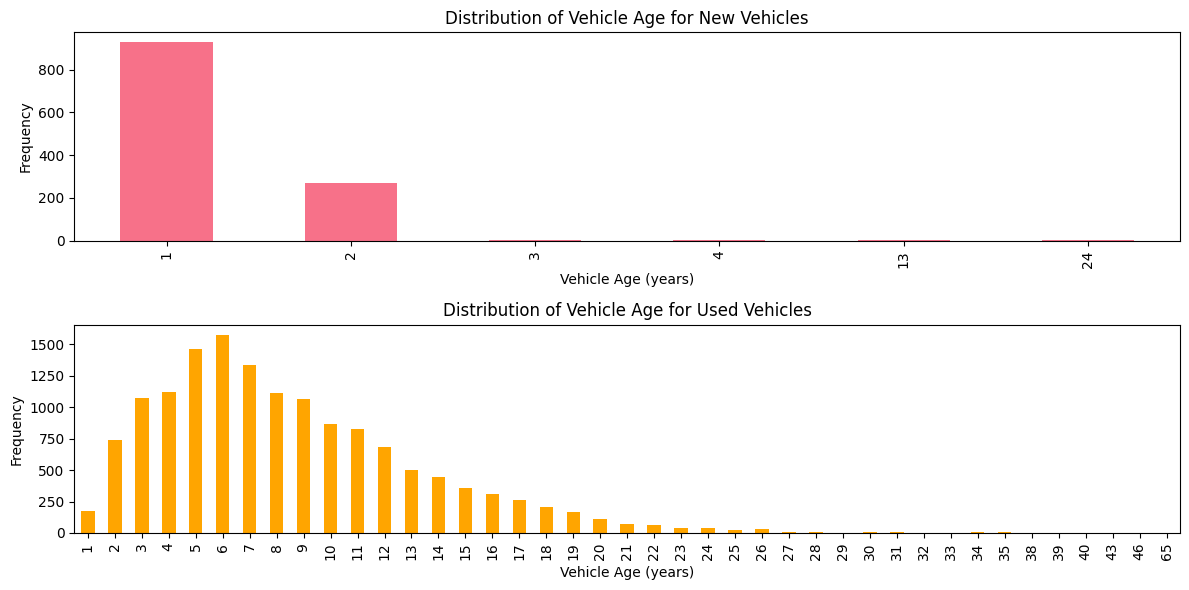

In [24]:
current_year = datetime.now().year
df['VehicleAge'] = current_year - df['Year']

# Separate the dataset into new and used vehicles
new_vehicles = df[df['UsedOrNew'].str.lower() == 'new']
used_vehicles = df[df['UsedOrNew'].str.lower() == 'used']

# Plot the distribution of vehicle age for new and used vehicles
plt.figure(figsize=(12, 6))

# Plot for new vehicles
plt.subplot(2, 1, 1)
new_vehicles['VehicleAge'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Vehicle Age for New Vehicles')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Frequency')

# Plot for used vehicles
plt.subplot(2, 1, 2)
used_vehicles['VehicleAge'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribution of Vehicle Age for Used Vehicles')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

#### **Analyze the results**:

**1. New vehicles:**
- The distribution of new vehicles is heavily skewed towards more recent years, with a concentration in the years 2023, 2022.

- This skewness suggests that consumers are predominantly purchasing newer models, potentially driven by factors such as advanced features, improved technology, or warranty coverage.

**2. Used vehicles:**
- The distribution of used vehicles is more evenly spread across a wider range of manufacturing years, including both recent and older models. Accordingly, it focused on the old vehicles which are around 5, 6, 7 year old.

- This broader distribution indicates a diverse selection of used vehicles in the market, providing consumers with options across various age groups.

**3. Market Dynamics:**
- The analysis highlights a clear distinction in the market dynamics between new and used vehicles. New vehicles showcase a trend of rapid turnover, while used vehicles offer a more diverse range of options, accommodating a broader budget spectrum and catering to individuals seeking different model years.

**4. Consumer Preferences:**
- Consumer preferences for new vehicles appear to align with the desire for the latest technologies and designs, as evidenced by the concentration in recent manufacturing years.

- In contrast, the used vehicle market caters to consumers with varied preferences, including those looking for cost-effective options, classic models, or specific features that may not be present in the newest releases

**5. Market Opportunities:**
- Businesses in the automotive industry can capitalize on the observed trends. Dealerships may focus marketing efforts on promoting the latest models to appeal to consumers interested in new vehicles. Simultaneously, there is an opportunity to emphasize the diverse selection of used vehicles, targeting a broader audience.

### 2. How does the fuel consumption vary across different car brands (top 10 popular brands)?

Fuel Consumption Across top 10 popular brands

In [25]:
top_10_brands_list = df['Brand'].value_counts().head(10).index
filtered_df = df[df['Brand'].isin(top_10_brands_list)][['FuelConsumption', 'Brand']]

In [26]:
filtered_df.groupby('Brand')['FuelConsumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Ford,975.0,8.599692,2.151588,0.0,7.4,8.5,9.2,16.2
Holden,1024.0,8.898438,2.498402,0.0,7.6,8.9,9.8,17.0
Hyundai,1172.0,7.349061,1.326930,0.0,6.9,7.4,7.9,12.0
Kia,776.0,7.682088,1.695817,0.0,6.8,7.4,7.9,12.8
Mazda,1102.0,7.524864,1.638185,0.0,6.3,7.5,8.4,13.9
Mercedes-Benz,551.0,7.366969,2.715263,0.0,6.0,7.0,8.7,18.6
Mitsubishi,967.0,7.846122,1.550857,0.0,7.2,7.6,8.6,14.7
Nissan,849.0,8.079270,2.300511,0.0,6.9,8.1,9.5,17.2
Toyota,2305.0,7.526985,2.488269,0.0,6.0,7.9,9.0,16.4


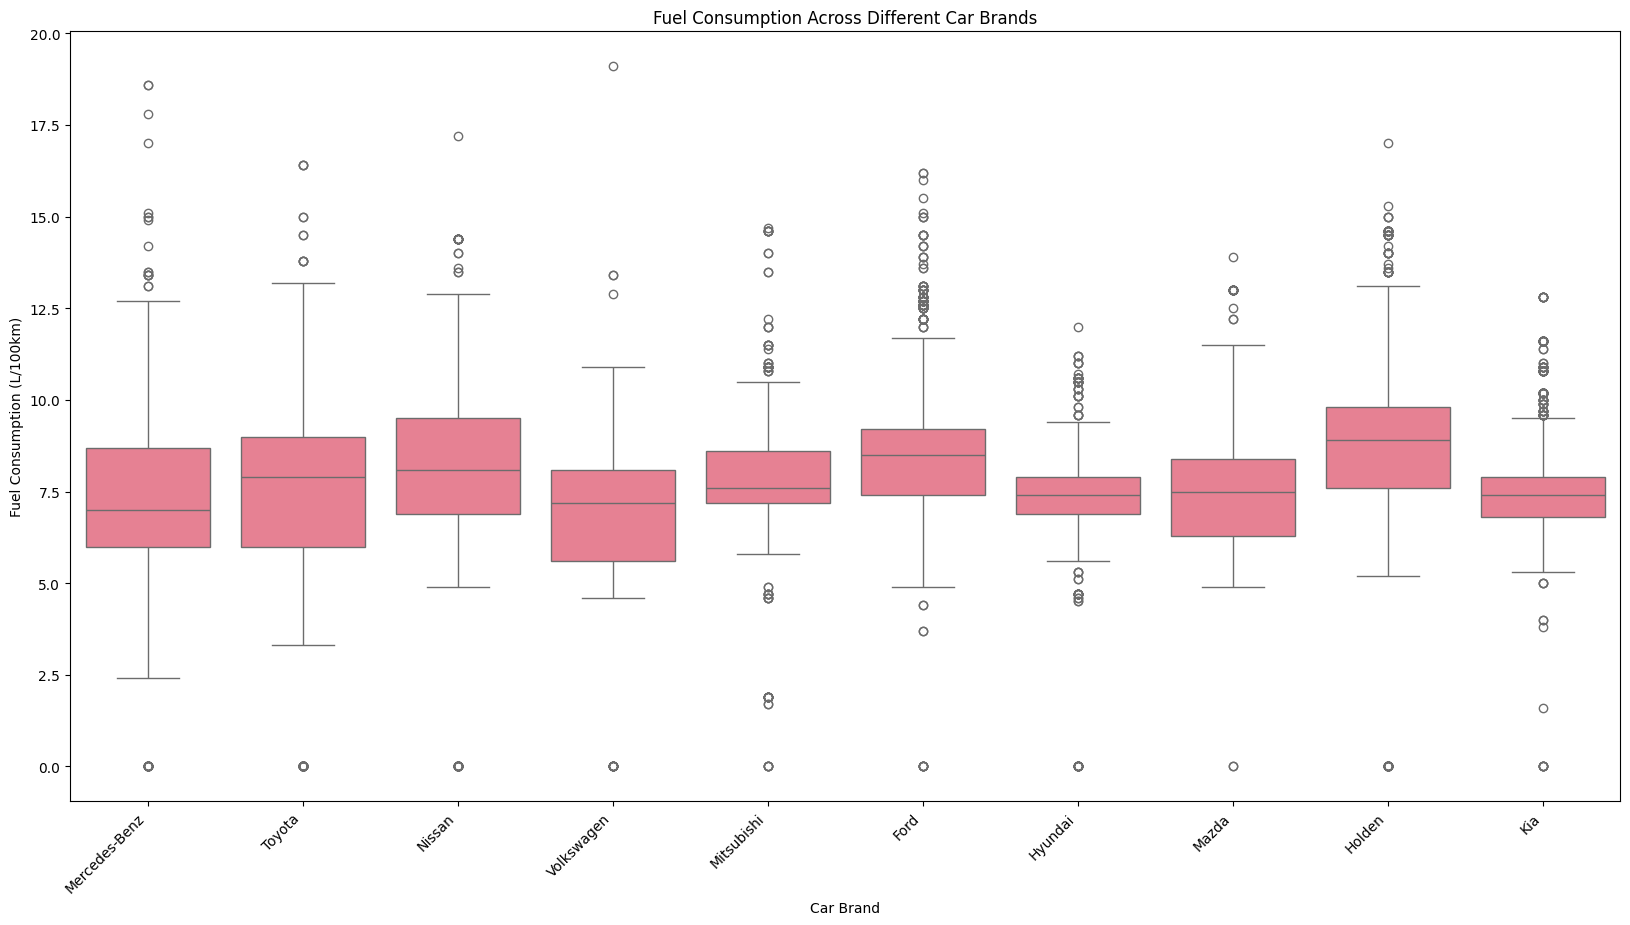

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Brand', y='FuelConsumption', data=filtered_df)
plt.title('Fuel Consumption Across Different Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Fuel Consumption (L/100km)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Which brand offers the most fuel-efficient vehicles on average?

           Brand  FuelConsumption
9     Volkswagen         6.896415
2        Hyundai         7.349061
5  Mercedes-Benz         7.366969
4          Mazda         7.524864
8         Toyota         7.526985
3            Kia         7.682088
6     Mitsubishi         7.846122
7         Nissan         8.079270
0           Ford         8.599692
1         Holden         8.898438


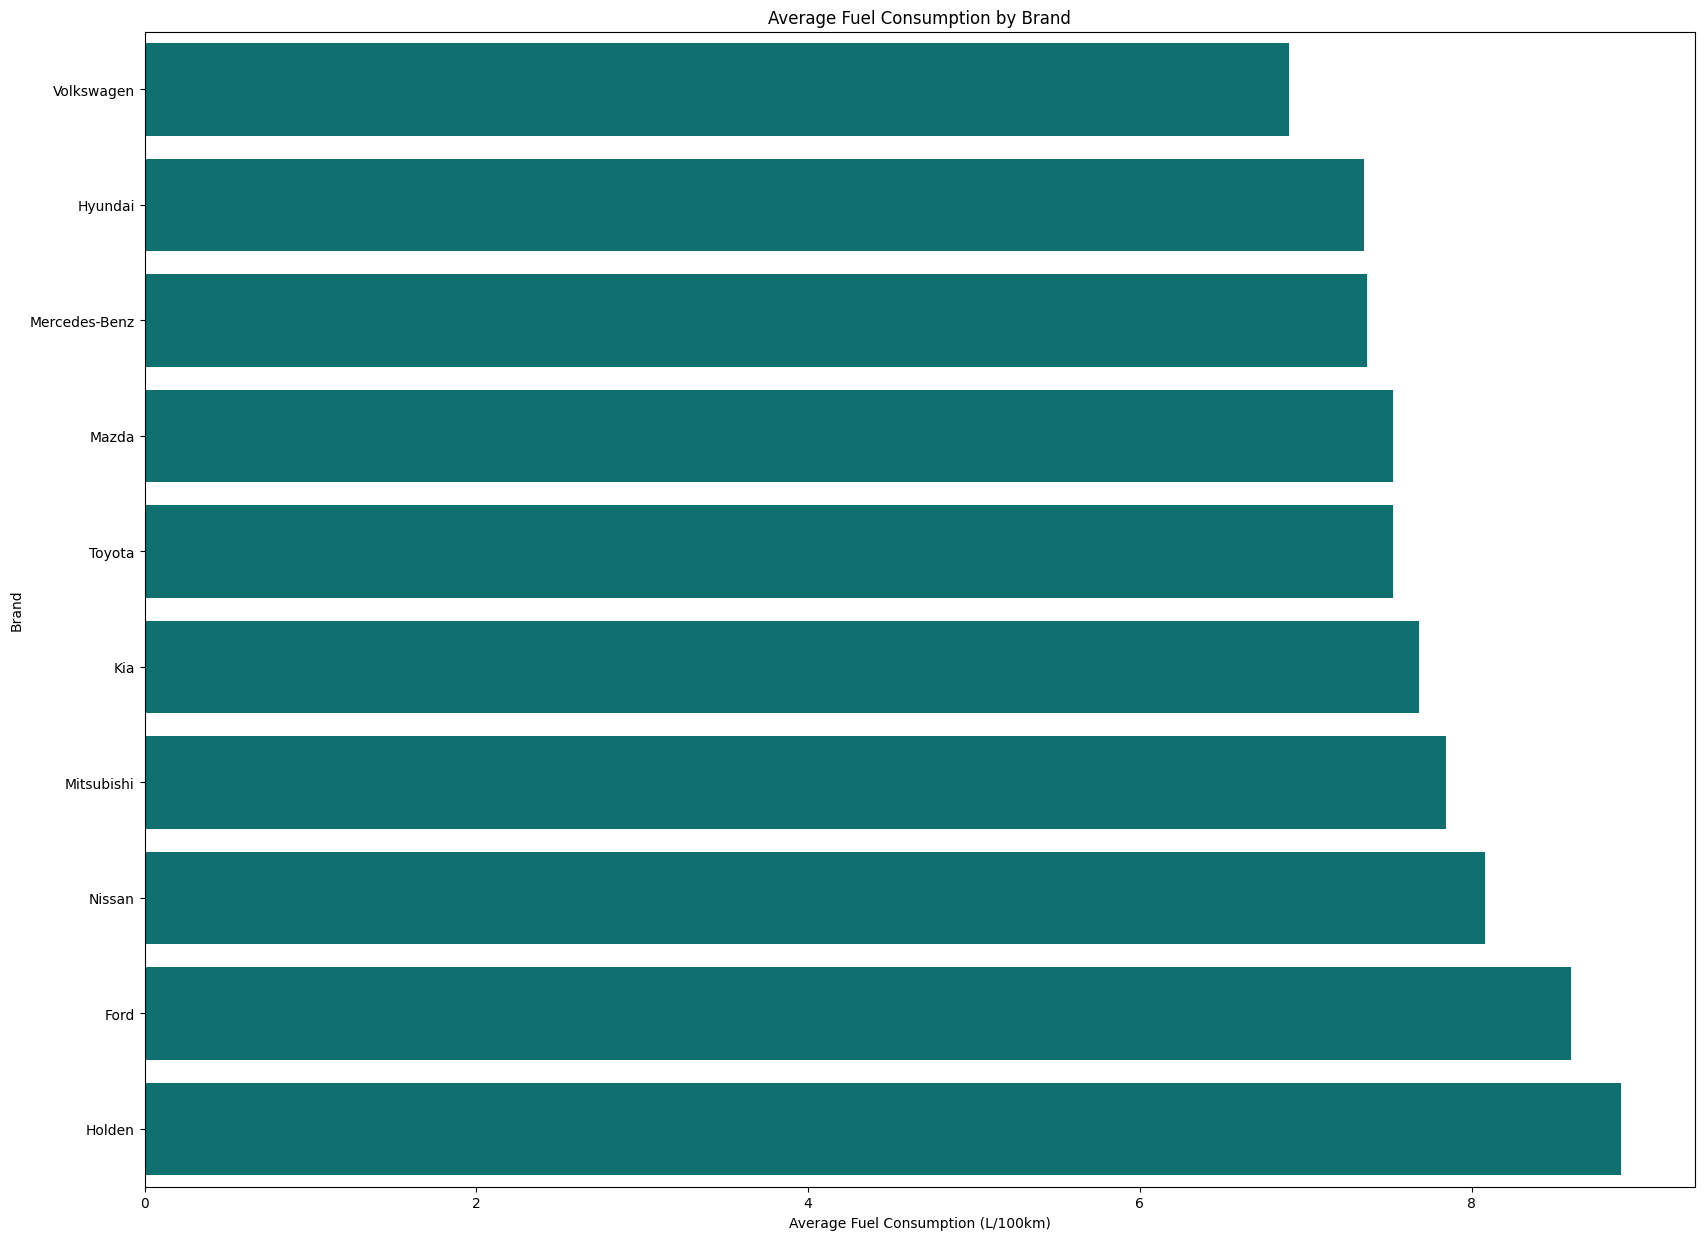

In [28]:
# Calculate the average fuel consumption for each brand
avg_fuel_efficiency = filtered_df.groupby('Brand')['FuelConsumption'].mean().reset_index()

# Sort the results to find the brand with the lowest average fuel consumption
avg_fuel_efficiency = avg_fuel_efficiency.sort_values('FuelConsumption', ascending=True)

# Display the results
print(avg_fuel_efficiency)

# Visualize the results using a bar chart
plt.figure(figsize=(20, 15))
sns.barplot(x='FuelConsumption', y='Brand', data=avg_fuel_efficiency, color='teal')
plt.title('Average Fuel Consumption by Brand')
plt.xlabel('Average Fuel Consumption (L/100km)')
plt.ylabel('Brand')
plt.show()

#### **Analyze the result:**

**1. Observation:**
- Toyota has the highest count, indicating a large representation in the dataset.

- Holden has the highest average fuel consumption among the listed brands.

- Volkswagen has the lowest average fuel consumption, suggesting higher fuel efficiency on average.

- There is variability in fuel consumption within each brand, as evident from the standard deviation values.

- The minimum fuel consumption for all brands is 0.0, which may indicate missing or erroneous data points.

- Brands like Mercedes-Benz and Volkswagen have relatively higher variability in fuel consumption, as indicated by their higher standard deviations.

**2. Market Opportunities:**

- Target Efficiency: Brands with lower fuel consumption (e.g., Volkswagen) can target environmentally conscious and cost-conscious consumers.

- Innovation for High Consumers: Brands with higher fuel consumption (e.g., Holden) can invest in research for fuel-efficient technologies, including hybrid or electric options.

- Diversify Offerings: Brands with a wide range of fuel consumption (e.g., Ford, Toyota) have opportunities to diversify products, appealing to various consumer preferences.

- Leverage Brand Image: Higher-end brands (e.g., Mercedes-Benz) can capitalize on luxury and innovation, aligning with consumer preferences beyond fuel efficiency.

- Educate Consumers: Brands with variability (e.g., Mercedes-Benz) can run educational campaigns to inform consumers about the range of fuel-efficient options within the brand.

### 3. Which location has the highest average price for cars?

Extract state in location

In [29]:
def extract_state(value):
    if ',' in value:
        res = value.split(',')[1].strip()
        if res == 'AU-VIC':
            return 'VIC'
        return res
    return value

df['State'] = df['Location'].apply(extract_state)
df['State'].unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'ACT', 'TAS', 'NT', 'Unknown'],
      dtype=object)

Visualize

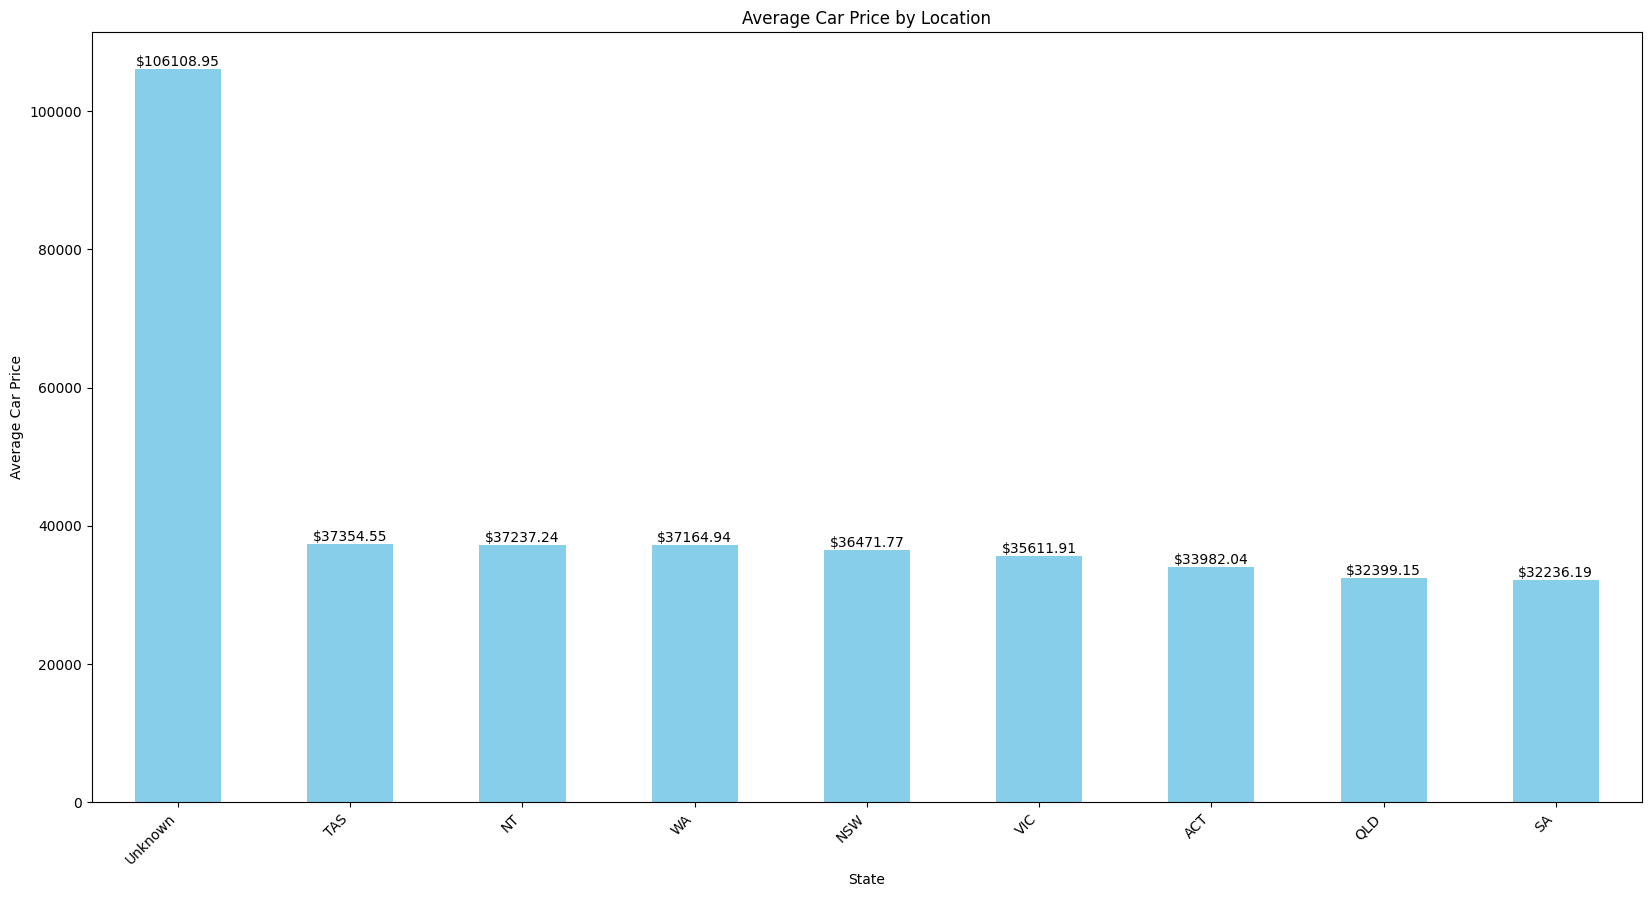

In [30]:
# Group the data by location and calculate the average price for each location
average_price_by_location = df.groupby('State')['Price'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(20, 10))
bar_plot = average_price_by_location.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by Location')
plt.xlabel('State')
plt.ylabel('Average Car Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels to the bars
for index, value in enumerate(average_price_by_location):
    bar_plot.text(index, value, f'${value:.2f}', ha='center', va='bottom')

plt.show()

#### **Analyze the result:**

Here are some of the Market Dynamics and Opportunities:

**1. Identifying High-Value Markets**:
- "Unknown" locations have the highest average car prices, significantly surpassing prices in recognized states and territories.

- Businesses can explore and understand the factors contributing to high prices in these unknown locations, potentially uncovering lucrative, niche markets with higher consumer purchasing power.

**2. Targeting Affluent Regions**:
- States like New South Wales (NSW) and Victoria (VIC) have relatively high average car prices.

- There is an opportunity for dealerships and manufacturers to target these affluent regions with premium or luxury vehicle offerings, as consumers in these 
areas may be willing to spend more on high-end models.

**3. Capitalizing on Demand in ACT**:
- The Australian Capital Territory (ACT) has a notable average car price, indicating a potentially affluent market.

- Businesses can tailor marketing strategies to emphasize premium features, advanced technologies, or exclusive models to appeal to consumers in the ACT.

**4. Understanding Regional Preferences**:
- Tasmania (TAS) and Northern Territory (NT) exhibit higher average prices compared to other states.

- Analyzing local preferences, such as a preference for specific vehicle types or features, can help businesses tailor their inventory to meet the demands of these regions.

**5. Exploring Growth in Western Australia (WA)**:
- Western Australia (WA) has a competitive average car price.

- Businesses might explore opportunities to further tap into this market by understanding local preferences and potentially introducing models that align with the lifestyle and preferences of consumers in WA.

**6. Offering Value in Queensland (QLD) and South Australia (SA)**:

- Queensland (QLD) and South Australia (SA) have relatively lower average car prices.

- Opportunities lie in offering value-oriented vehicles, promotions, or financing options to appeal to a broader consumer base in these regions.

**7. Adapting Strategies for Unknown Locations**:

- Further investigation is needed for the "Unknown" category with the highest average car prices.

- Businesses may want to uncover and target specific cities or regions within this category, adapting their strategies to capitalize on the high-price market potential.


###  4. Is there a correlation between numerical data ?

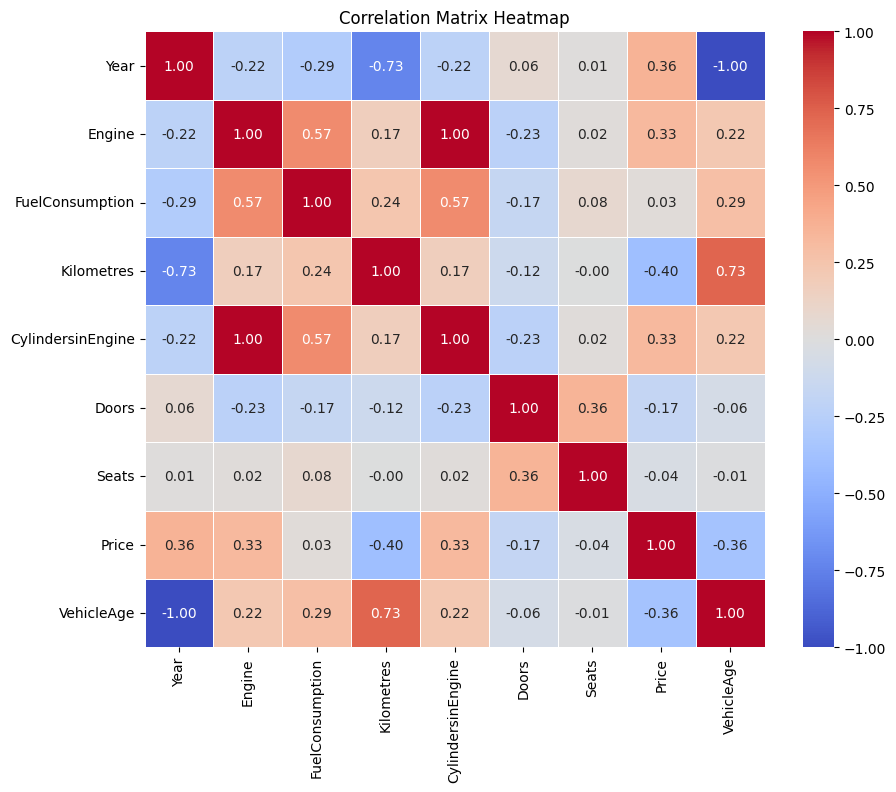

In [31]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### **Analyze the results:**

**1. Analyze**:

*1.1. Year and VehicleAge*

- There is a perfect negative correlation of -1.000 between "Year" and "VehicleAge," which is expected. As the manufacturing year decreases, the age of the vehicle increases.

*1.2. Engine and CylindersinEngine:*

- There is a positive correlation of 1.000 between "Engine" and "CylindersinEngine," indicating a strong linear relationship. This is expected, as the number of cylinders in the engine is directly related to its size (displacement).

*1.3. Kilometres and VehicleAge:*

- There is a strong positive correlation of 0.728 between "Kilometres" and "VehicleAge." This suggests that older vehicles tend to have higher mileage, which is a logical relationship.

*1.4. Doors and Seats:*

- There is a moderate positive correlation of 0.357 between "Doors" and "Seats." This indicates that vehicles with more doors tend to have more seats, which aligns with typical car configurations.

*1.5. Price and Year, Engine, Kilometres, CylindersinEngine:*

- "Price" shows positive correlations with "Year" (0.361), "Engine" (0.326), and "CylindersinEngine" (0.326). This suggests that newer vehicles, larger engine sizes, and more cylinders are associated with higher prices.

- There is a negative correlation of -0.398 between "Price" and "Kilometres," indicating that as the mileage increases, the price tends to decrease.

*1.6. FuelConsumption and other Variables:*

- "FuelConsumption" shows weak correlations with other variables, indicating that fuel consumption is not strongly linked to variables such as year, engine size, or kilometers.

**2. Observation:**

- Newer vehicles tend to be more expensive.

- Engine size and the number of cylinders are positively correlated.

- Older vehicles have higher mileage.

- More doors are associated with more seats.

- Price is influenced by factors like newer manufacturing year, larger engine size, and fewer kilometers.

**3.Market Opportunities:**

- Dealerships can emphasize the value of newer models, larger engines, and lower mileage in marketing campaigns to potentially justify higher prices.

- Manufacturers could explore producing vehicles with larger engines, aligning with consumer preferences that contribute to higher prices.

- There may be opportunities to market older vehicles with higher mileage as budget-friendly options.


### 5. What is the average price difference between new and used cars for each brand?

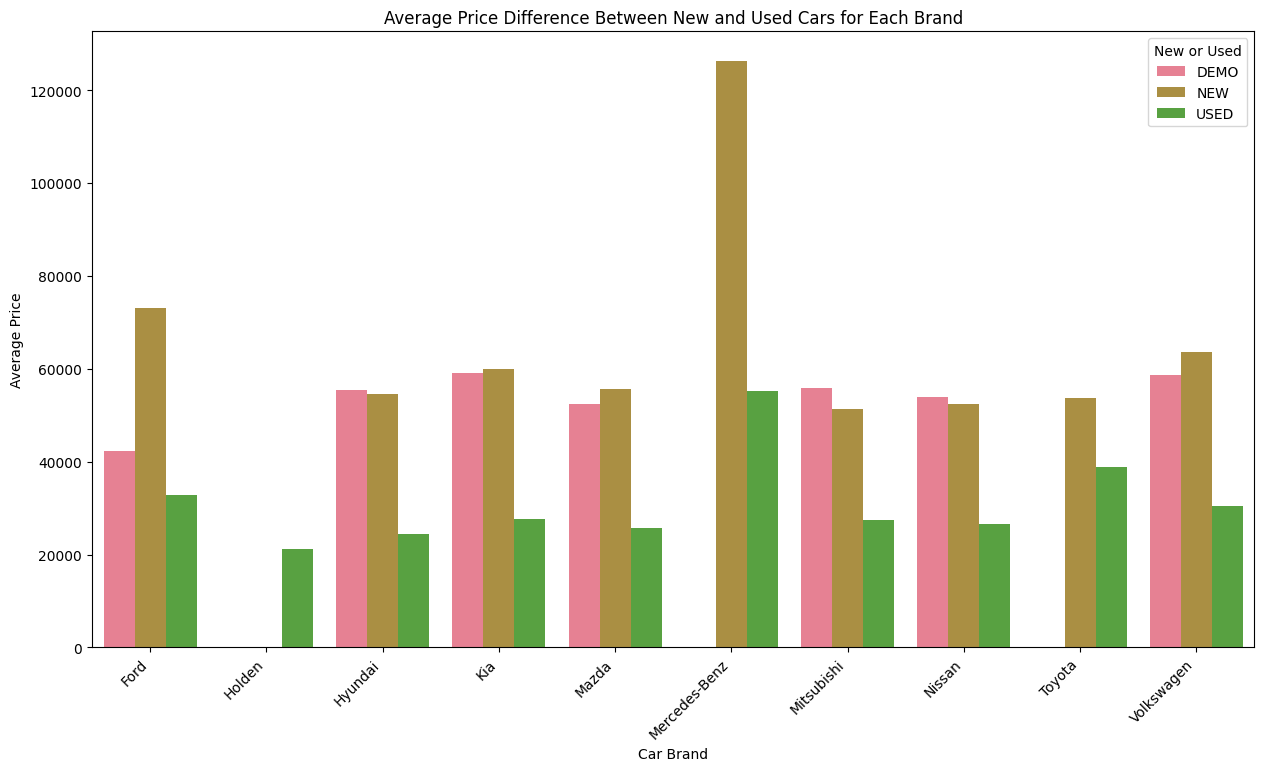

In [32]:
# Group the data by brand and new/used category, and calculate the average price for each group
average_price_by_brand_category = df[df['Brand'].isin(top_10_brands_list)].groupby(['Brand', 'UsedOrNew'])['Price'].mean().reset_index()

# Create a bar plot to visualize the average price difference between new and used cars for each brand
plt.figure(figsize=(15, 8))
sns.barplot(x='Brand', y='Price', hue='UsedOrNew', data=average_price_by_brand_category)
plt.title('Average Price Difference Between New and Used Cars for Each Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='New or Used')
plt.show()

#### **Analyze the results:**

**1. Analyze:**

*1.1. Brand Variations:*

- Each brand is represented across three categories: "DEMO," "NEW," and "USED."

- Brands like Ford, Hyundai, Kia, Mazda, Mercedes-Benz, Mitsubishi, Nissan, Toyota, and Volkswagen are included in the dataset.

*1.2. Price Differences:*

- The "Price" column represents the average price for each category and brand.

- The "DEMO" category typically has prices higher than the "NEW" category for brands like Ford, Hyundai, Kia, Mazda, Mercedes-Benz, Mitsubishi, Nissan, and Volkswagen. This may be due to demo vehicles often having additional features or being more equipped for test drives.
- The "USED" category generally has lower prices compared to both "DEMO" and "NEW" categories for most brands. This is expected, as used cars usually have lower prices than their new counterparts.

*1.3. Brand-Specific Observations:*

- Mercedes-Benz has a significant price difference between new and used cars, with new cars being substantially more expensive than used ones.

- Some brands, such as Ford, Hyundai, and Kia, have higher average prices for demo cars compared to new cars. This might be due to specific features or conditions of demo vehicles.

- Toyota shows a smaller price difference between new and used cars compared to some other brands.

**2. Market Dynamics:**

- Brands with higher average prices for new cars may be positioned as offering premium or high-end models.

- Brands with smaller price differences or lower prices for new cars may attract cost-conscious consumers looking for more budget-friendly options.

**3. Market Opportunities:**

- Dealerships can capitalize on the popularity of demo cars by highlighting their features and offering test drives to potential customers.

- Brands with significant price differences between new and used cars may explore marketing strategies to emphasize the value, features, or warranties associated with new models.

- Brands with smaller price differences or lower average prices for new cars can target a broader consumer base by appealing to budget-conscious buyers.

### 6. What types of vehicles (brand, body type) are more popular in different locations?

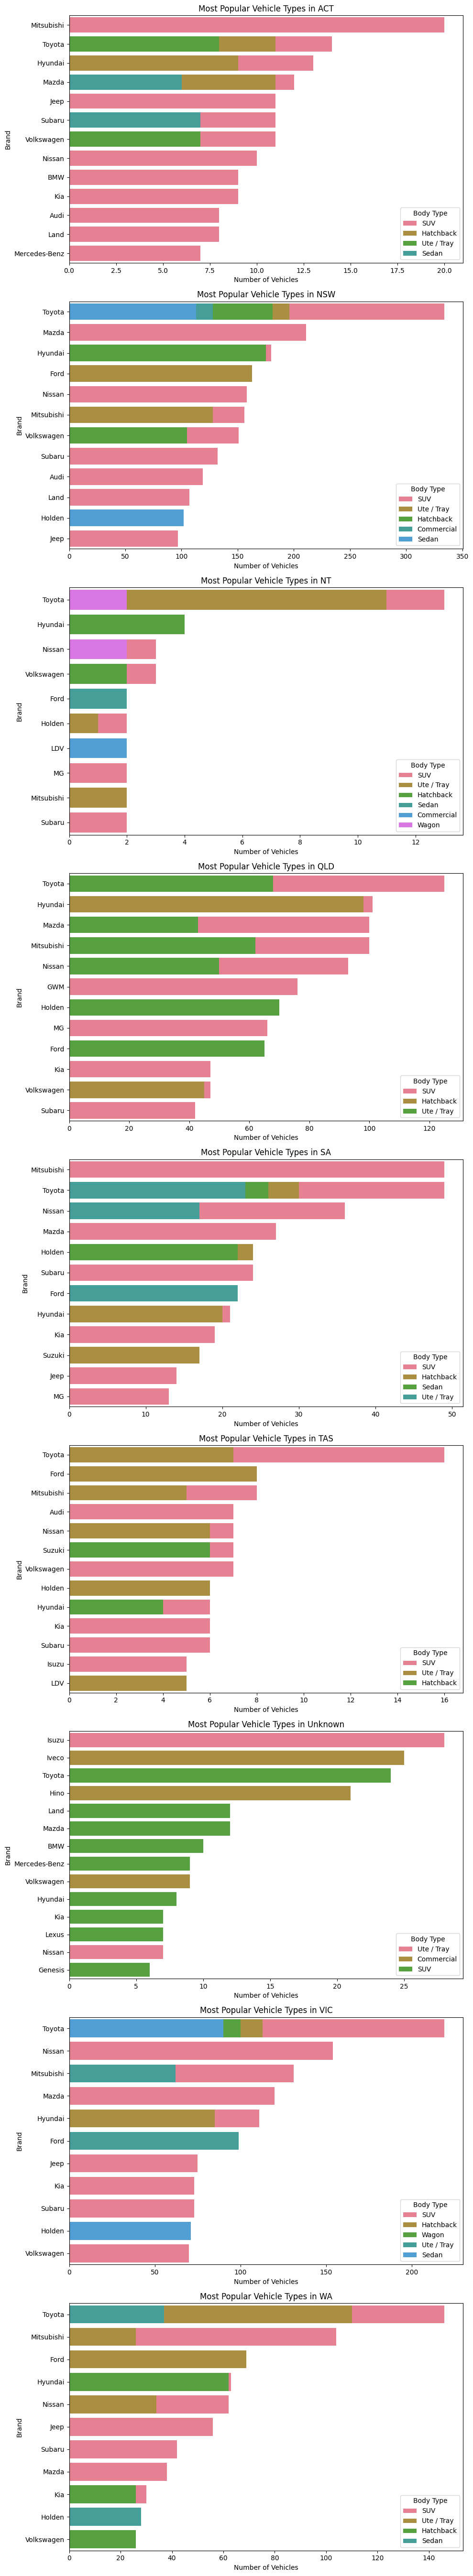

In [33]:
# Group by 'Location', 'Brand', and 'BodyType', then count the occurrences
popularity = df.groupby(['State', 'Brand', 'BodyType']).size().reset_index(name='Counts')

# Sort the results to find the most popular combinations
popularity = popularity.sort_values(by=['State', 'Counts'], ascending=[True, False])

# Since there could be many locations, let's visualize the top N popular vehicle types for the first few locations
top_n = 20
unique_locations = popularity['State'].unique()

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=len(unique_locations), figsize=(10, 6 * len(unique_locations)))

for i, location in enumerate(unique_locations):
    location_data = popularity[popularity['State'] == location].head(top_n)
    
    # Use the current subplot for each location
    ax = axes[i]
    
    sns.barplot(x='Counts', y='Brand', hue='BodyType', data=location_data, dodge=False, ax=ax)
    ax.set_title(f'Most Popular Vehicle Types in {location}')
    ax.set_xlabel('Number of Vehicles')
    ax.set_ylabel('Brand')
    ax.legend(title='Body Type')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### **Analyze the results:**

**1. Observations:**

*1.1. SUV Dominance:*

- SUVs are consistently popular across all states, representing a significant portion of the vehicle market. Brands like Toyota, Mazda, Hyundai, and Mitsubishi often dominate the SUV category.

*1.2. Toyota's Overall Dominance:*

- Toyota stands out as the most popular brand in almost every state, with a strong presence across various body types, including SUVs, Ute/Tray, Hatchback, Sedan, and Wagon.

*1.3. Body Type Variations:*

- While SUVs are dominant, there is diversity in body types across states. Ute/Tray, Hatchback, Sedan, Wagon, and Commercial vehicles are present in varying degrees, reflecting diverse consumer preferences.

*1.4. Regional Preferences:*

- Each state shows unique preferences for specific brands and body types. For instance, Mitsubishi is popular in SA, Mazda in VIC, and Nissan in QLD, showcasing regional variations in brand preferences.

*1.5. Premium Brands in Certain States:*

- Premium brands like BMW, Audi, Mercedes-Benz, and Lexus are more prevalent in certain states, reflecting potential differences in consumer affluence and preferences.

*1.6. Commercial Vehicles:*

- Commercial vehicles, including Ute/Tray and Commercial categories, are present across states, highlighting the importance of these vehicles for businesses and trade.

**2. Market Opportunities:**

- **Capitalizing on SUV Popularity**: Manufacturers and dealerships can capitalize on the continued popularity of SUVs by introducing new models, features, or variants that align with consumer preferences.

- **Strategic Brand Positioning**: Brands can strategically position themselves based on regional preferences. Understanding which brands are popular in specific states allows for more targeted marketing and product development.

- **Diversification of Body Types**: Offering a diverse range of body types, including Ute/Tray, Hatchback, Sedan, and Wagon, can help car manufacturers cater to a broader audience with varying needs and preferences.

- **Competitive Analysis**: Brands can conduct competitive analyses to understand their market share in each state and identify opportunities for growth or improvement.

- **Premium Brand Presence**: Premium brands should focus on strengthening their presence in states where they are less dominant, potentially through strategic marketing campaigns or expanding their model offerings.

## Reflection

**Each member**: Team members find difficult in resolve conflict in notebook file

**Learning**:

- Nguyen Hoang Lam:
    - Learning EDA process and making questions about data.
    - Practice and visualize charts using Pandas, Matplotlib and Seaborn.

- Huynh Minh Tu:
    - Learning EDA process and making questions about data.

- Huynh Minh Tuan:
    - Learning EDA process and making questions about data.

**Future analysis**: If we had more time, we could implement some machine learning models, using some APIs like ChatGPT to replace `Unknown` values.

## Reference

- CLL, [EDA and Preprocessing Cars Prices Australia](https://www.kaggle.com/code/carloscll/eda-and-preprocessing-cars-prices-australia)
- Stackoverflow, [How to force a merge to succeed when there are conflicts?](https://stackoverflow.com/questions/36820084/how-to-force-a-merge-to-succeed-when-there-are-conflicts)